Importing the Libraries 

In [37]:
import pandas as pd 
import numpy as np 
import sklearn as sk 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

Uplodaing Data

In [38]:
df = pd.read_csv('gender_classification_v7.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


to check outliers in forehead_width_cm and forehead_height_cm#to check outliers in forehead_width_cm and forehead_height_cm

<AxesSubplot:xlabel='forehead_width_cm'>

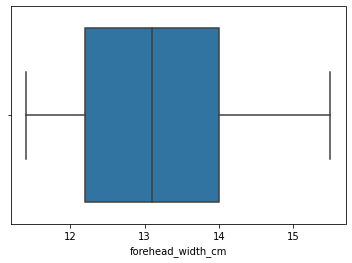

In [40]:
sns.boxplot(data=df,x="forehead_width_cm")

<AxesSubplot:xlabel='forehead_height_cm'>

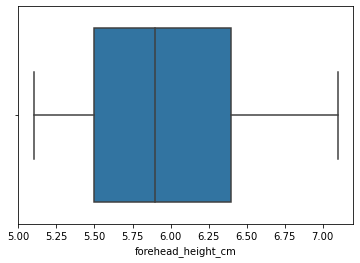

In [41]:
sns.boxplot(data=df,x = 'forehead_height_cm')

Train and test data

In [42]:
from sklearn.model_selection import train_test_split
x = df.drop(columns='gender')
y = df['gender']
X_train, X_test,Y_train,Y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

Logistic Regression

In [43]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [44]:
Y_pred=lr.predict(X_test)
Y_pred

array(['Female', 'Male', 'Male', ..., 'Male', 'Male', 'Female'],
      dtype=object)

In [48]:
print("model_accuracy_on_train_data = ",lr.fit(X_train,Y_train).score(X_train,Y_train))

model_accuracy_on_train_data =  0.9685333333333334


knn model

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [51]:
Y_pred = knn.predict(X_test)
Y_pred

array(['Female', 'Male', 'Male', ..., 'Male', 'Male', 'Male'],
      dtype=object)

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[624  18]
 [ 22 587]]


<AxesSubplot:>

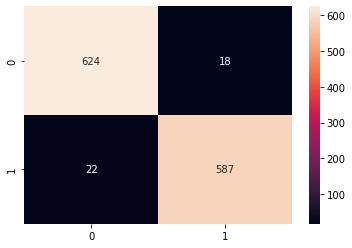

In [55]:
sns.heatmap(cm,annot = True, fmt = ".0f")

In [57]:
print("model_accuracy =",accuracy_score(Y_test, Y_pred))


model_accuracy = 0.9680255795363709


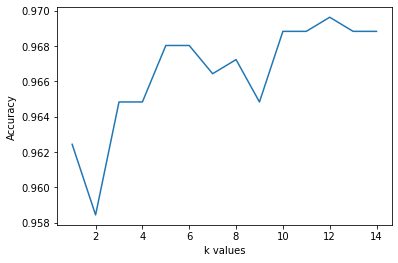

In [59]:
score_list = []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors =k)
    knn.fit(X_train, Y_train)
    score_list.append(knn.score(X_test, Y_test))

plt.plot(range(1,15), score_list)
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.show()